In [51]:
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [52]:
# importing libraries such as panadas for Dataframe and numpy for manupulating arrays
import pandas as pd
import numpy as np

# Reading CSV file  

In [61]:
wildlife = pd.read_csv("MODIS_C6_1_South_Asia_7d.csv")

In [62]:
wildlife.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,7.37478,81.37296,318.39,1.01,1.01,2022-05-11,501,T,70,6.1NRT,292.44,11.15,D
1,28.47017,80.96015,324.15,1.46,1.19,2022-05-11,455,T,19,6.1NRT,299.90,12.90,D
2,27.89231,81.54675,326.51,1.33,1.14,2022-05-11,455,T,72,6.1NRT,300.69,10.63,D
3,26.63741,82.95482,331.01,1.10,1.05,2022-05-11,457,T,72,6.1NRT,305.98,11.30,D
4,26.64724,80.03714,325.69,1.58,1.24,2022-05-11,457,T,58,6.1NRT,302.43,14.25,D


In [63]:
wildlife.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

In [64]:
wildlife.shape

(1887, 13)

In [65]:
wildlife.corr()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
latitude,1.000000,-0.509256,0.116069,0.065346,0.079685,0.005377,0.090678,0.299477,0.019595
longitude,-0.509256,1.000000,-0.113887,0.022991,0.007975,-0.178640,-0.139169,-0.281715,-0.005705
brightness,0.116069,-0.113887,1.000000,-0.081876,-0.077994,-0.652030,0.384174,0.773638,0.440651
scan,0.065346,0.022991,-0.081876,1.000000,0.991370,-0.004605,-0.056816,-0.142012,0.441386
track,0.079685,0.007975,-0.077994,0.991370,1.000000,0.002640,-0.051353,-0.130261,0.438875
acq_time,0.005377,-0.178640,-0.652030,-0.004605,0.002640,1.000000,0.122254,-0.608192,-0.099741
confidence,0.090678,-0.139169,0.384174,-0.056816,-0.051353,0.122254,1.000000,0.171835,0.315004
bright_t31,0.299477,-0.281715,0.773638,-0.142012,-0.130261,-0.608192,0.171835,1.000000,0.022563
frp,0.019595,-0.005705,0.440651,0.441386,0.438875,-0.099741,0.315004,0.022563,1.000000


# Creating An Heat Map 

<AxesSubplot:>

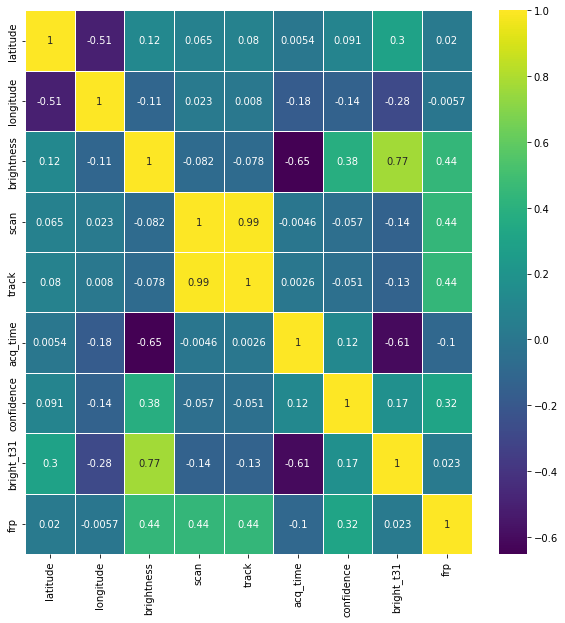

In [66]:
plt.figure(figsize=(10, 10))
sns.heatmap(wildlife.corr(),annot=True,cmap='viridis',linewidths=.5)

In [67]:
wildlife['version'].value_counts()

6.1NRT    1887
Name: version, dtype: int64

In [68]:
#As version is same for all we can drop this column
wildlife = wildlife.drop(['version'], axis = 1)

In [69]:
#From heatMap we can conclude 'track' column has an high value so we can drop this column
wildlife = wildlife.drop(['track'], axis = 1)

# Scaling down the Numeric Columns

In [70]:
wildlife.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
acq_date       object
acq_time        int64
satellite      object
confidence      int64
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [71]:
wildlife.describe()

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,27.431809,77.154410,328.448686,1.395140,917.121887,68.115527,307.411712,22.826010
std,5.973244,6.519533,12.280089,0.535207,477.929014,17.241913,10.210443,31.031252
min,5.581600,54.315140,300.480000,1.000000,349.000000,0.000000,272.030000,3.200000
25%,22.365765,73.935380,320.225000,1.030000,540.000000,60.000000,298.500000,10.175000
50%,30.474080,75.840480,331.350000,1.160000,758.000000,71.000000,309.540000,15.100000
75%,32.198300,79.070680,336.310000,1.560000,841.000000,79.000000,315.615000,25.905000
max,39.849320,101.964660,382.620000,4.470000,2229.000000,100.000000,329.620000,727.930000


As observed, the min_value amongst these Numeric Columns is 0, while the max_value if 2229, indicating a huge disparity amongst the Numeric features of this dataset.
To normalize that, we'll Scale down the Numeric fetaures

In [72]:
numeric_cols = ['latitude', 'longitude', 'brightness', 'frp']

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
wildlife[numeric_cols] = scaler.fit_transform(wildlife[numeric_cols])

In [75]:
wildlife.describe()

,latitude,longitude,brightness,scan,acq_time,confidence,bright_t31,frp
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,0.637632,0.479318,0.340500,1.395140,917.121887,68.115527,307.411712,0.027080
std,0.174311,0.136823,0.149502,0.535207,477.929014,17.241913,10.210443,0.042818
min,0.000000,0.000000,0.000000,1.000000,349.000000,0.000000,272.030000,0.000000
25%,0.489795,0.411762,0.240382,1.030000,540.000000,60.000000,298.500000,0.009624
50%,0.726412,0.451743,0.375822,1.160000,758.000000,71.000000,309.540000,0.016420
75%,0.776728,0.519534,0.436206,1.560000,841.000000,79.000000,315.615000,0.031329
max,1.000000,1.000000,1.000000,4.470000,2229.000000,100.000000,329.620000,1.000000


We'll be dealing with the 'acq_time' column in a different way

# Encoding Some of the Categorical Columns

In [76]:
print(wildlife['satellite'].value_counts())

A    972
T    915
Name: satellite, dtype: int64


In [77]:
wildlife['satellite']=wildlife['satellite'].map({"A":1 ,"T":0})

In [78]:
print(wildlife['daynight'].value_counts())

D    1484
N     403
Name: daynight, dtype: int64


In [79]:
wildlife['daynight'] = wildlife['daynight'].map({'D':1, 'N':0})

In [80]:
wildlife['acq_date'] = pd.to_datetime(wildlife['acq_date'])
wildlife['acq_date']

0      2022-05-11
1      2022-05-11
2      2022-05-11
3      2022-05-11
4      2022-05-11
          ...    
1882   2022-05-18
1883   2022-05-18
1884   2022-05-18
1885   2022-05-18
1886   2022-05-18
Name: acq_date, Length: 1887, dtype: datetime64[ns]

In [81]:
wildlife['year'] = wildlife['acq_date'].dt.year
wildlife['month'] = wildlife['acq_date'].dt.month
wildlife['day'] = wildlife['acq_date'].dt.day
wildlife.head

<bound method NDFrame.head of       latitude  longitude  brightness  scan   acq_date  acq_time  satellite  \
0     0.052329   0.567851    0.218042  1.01 2022-05-11       501          0   
1     0.667934   0.559187    0.288167  1.46 2022-05-11       455          0   
2     0.651071   0.571498    0.316898  1.33 2022-05-11       455          0   
3     0.614450   0.601049    0.371682  1.10 2022-05-11       457          0   
4     0.614737   0.539817    0.306915  1.58 2022-05-11       457          0   
...        ...        ...         ...   ...        ...       ...        ...   
1882  0.804123   0.433612    0.370343  1.00 2022-05-18       818          1   
1883  0.804079   0.433388    0.284636  1.00 2022-05-18       818          1   
1884  0.805308   0.418245    0.293280  1.00 2022-05-18       818          1   
1885  0.815319   0.413071    0.251157  1.01 2022-05-18       818          1   
1886  0.530973   0.673092    0.099099  1.68 2022-05-18      1558          0   

      confidence  bri

In [82]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
wildlife['scan_binned'] = pd.cut(wildlife['scan'], bins=bins, labels=labels)
wildlife = wildlife.drop(['scan'], axis = 1)


In [83]:
wildlife['scan_binned']


0       2
1       2
2       2
3       2
4       2
       ..
1882    1
1883    1
1884    1
1885    2
1886    2
Name: scan_binned, Length: 1887, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

# Tracing the Train and Test Parameters

In [84]:
y = wildlife['confidence']
X = wildlife.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31'], axis = 1)

In [85]:
X.head


<bound method NDFrame.head of       latitude  longitude  brightness  satellite       frp  daynight  year  \
0     0.052329   0.567851    0.218042          0  0.010970         1  2022   
1     0.667934   0.559187    0.288167          0  0.013384         1  2022   
2     0.651071   0.571498    0.316898          0  0.010252         1  2022   
3     0.614450   0.601049    0.371682          0  0.011177         1  2022   
4     0.614737   0.539817    0.306915          0  0.015247         1  2022   
...        ...        ...         ...        ...       ...       ...   ...   
1882  0.804123   0.433612    0.370343          1  0.017676         1  2022   
1883  0.804079   0.433388    0.284636          1  0.006471         1  2022   
1884  0.805308   0.418245    0.293280          1  0.006623         1  2022   
1885  0.815319   0.413071    0.251157          1  0.003532         1  2022   
1886  0.530973   0.673092    0.099099          0  0.009507         0  2022   

      month  day scan_binned  
0 

In [86]:
X.shape

(1887, 10)

# Splitting the dataset into train and test 

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [88]:
X_train

,latitude,longitude,brightness,satellite,frp,daynight,year,month,day,scan_binned
1649,0.545962,0.559014,0.407232,1,0.031363,1,2022,5,17,3
385,0.443757,0.649443,0.319455,0,0.009742,1,2022,5,13,2
930,0.787546,0.453412,0.123691,1,0.008431,0,2022,5,14,2
1387,0.307078,0.476920,0.415632,1,0.020573,1,2022,5,16,2
347,0.504513,0.535686,0.124178,0,0.005906,0,2022,5,12,2
...,...,...,...,...,...,...,...,...,...,...
835,0.758727,0.416001,0.418432,1,0.023402,1,2022,5,14,2
1216,0.811966,0.410104,0.300706,0,0.022257,0,2022,5,15,2
1653,0.538891,0.514767,0.404431,1,0.050212,1,2022,5,17,4
559,0.845890,0.392680,0.028610,0,0.004926,0,2022,5,13,2


In [89]:
y_train

1649     66
385      58
930      81
1387     74
347      74
       ... 
835      47
1216    100
1653     65
559      38
684      75
Name: confidence, Length: 1509, dtype: int64

In [90]:
X_train.isnull().sum()

latitude       0
longitude      0
brightness     0
satellite      0
frp            0
daynight       0
year           0
month          0
day            0
scan_binned    0
dtype: int64

In [91]:
X_train['scan_binned'].fillna(wildlife['scan_binned'].mode()[0], inplace=True)

In [92]:
X_train.isnull().sum()

latitude       0
longitude      0
brightness     0
satellite      0
frp            0
daynight       0
year           0
month          0
day            0
scan_binned    0
dtype: int64

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
 # create regressor object
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
#Building the Linear Regression Model 
#from sklearn.linear_model import LinearRegression

#model = LinearRegression()
#model.fit(X_train, y_train)

In [96]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_train)
mean_squared_error(y_train,y_pred,squared=False)

4.223839855853826

In [97]:
y_train.max()

100

In [98]:
y_test

579      71
1183     58
1010    100
1330     25
77       55
       ... 
268      80
708      91
31       52
1560     42
1031     52
Name: confidence, Length: 378, dtype: int64

In [99]:
X_test['scan_binned'].fillna(wildlife['scan_binned'].mode()[0], inplace=True)

In [100]:
X_test

,latitude,longitude,brightness,satellite,frp,daynight,year,month,day,scan_binned
579,0.408737,0.462170,0.098003,0,0.007603,0,2022,5,13,2
1183,0.741374,0.494188,0.070124,0,0.009976,0,2022,5,15,2
1010,0.635515,0.338133,0.756270,0,0.130752,1,2022,5,15,2
1330,0.257648,0.971113,0.204285,1,0.002566,1,2022,5,16,1
77,0.741608,0.448199,0.392379,1,0.009507,1,2022,5,11,2
...,...,...,...,...,...,...,...,...,...,...
268,0.729880,0.426642,0.470295,0,0.014171,1,2022,5,12,2
708,0.688739,0.459992,0.589238,0,0.044637,1,2022,5,14,2
31,0.464895,0.523205,0.385439,1,0.011425,1,2022,5,11,1
1560,0.532533,0.910084,0.170684,0,0.009714,1,2022,5,17,2


In [101]:
y_predict = model.predict(X_test) 
y_predict

array([67.61, 59.04, 99.98, 50.5 , 71.45, 52.15, 52.08, 97.61, 61.43,
       29.86, 59.23, 78.11, 69.67, 82.53, 58.29, 50.96, 78.78, 74.81,
       73.3 , 78.76, 71.27, 85.25, 54.41, 64.45, 42.17, 69.51, 69.94,
       74.15, 81.94, 73.76, 48.82, 65.29, 82.24, 92.23, 58.74, 68.1 ,
       59.58, 66.65, 71.89, 48.56, 59.74, 73.3 , 57.39, 48.59, 62.27,
       84.09, 49.63, 45.32, 77.89, 61.43, 45.91, 72.17, 74.92, 96.78,
       71.45, 73.07, 75.35, 72.91, 69.66, 61.89, 62.16, 71.31, 49.63,
       73.53, 41.76, 71.86, 73.26, 70.58, 65.71, 61.51, 71.29, 62.55,
       65.37, 47.85, 60.88, 79.53, 59.24, 69.59, 66.44, 97.95, 53.62,
       67.4 , 69.63, 70.51, 64.2 , 71.36, 83.01, 89.35, 71.61, 78.73,
       76.15, 75.33, 64.29, 36.54, 68.74, 49.06, 55.75, 76.26, 56.21,
       93.45, 49.94, 99.2 , 74.61, 51.63, 81.24, 68.44, 59.01, 96.88,
       63.32, 71.96, 46.35, 51.21, 68.56, 99.49, 62.37, 49.13, 57.42,
       48.41, 68.73, 74.23, 72.18, 62.89, 60.43, 74.61, 85.89, 72.67,
       52.47, 81.87,

In [102]:
mean_squared_error(y_test,y_predict,squared=False)

11.022372162798627

In [103]:
def conf(lat,long,br,sat,frp,dn,yr,mn,day,scan):
    #arr=[lat,long,br,frp,dn,scan,yr,mn,day];
    dict = {'latitude': lat, 'longitude': long,'brightness':br,'satellite':sat, 'frp': frp, 'daynight': dn, 'year': yr, 'month': mn, 'day': day,'scan_binned': scan}
    df=pd.DataFrame(dict, index=[0])
    ys=model.predict(df)
    return ys
    

In [104]:
def inp():
    lat=input();
    long=input();
    br=input();
    frp=input();
    dn=input();
    scan=input();
    yr=input();
    mn=input();
    day=input();
    sat=input();
    print(conf(lat,long,br,sat,frp,dn,yr,mn,day,scan));  

In [106]:
inp()

[70.7]


In [97]:
!pip install gradio

You should consider upgrading via the 'C:\Users\Shreeyash Pandey\uh\envs\new\python.exe -m pip install --upgrade pip' command.


In [98]:
import gradio as gr

In [99]:
interface=gr.Interface(fn=conf,
                      inputs=["text","text","text","text","text","text","text","text","text","text"],outputs=["text"])

In [100]:
interface.launch()

Running on local URL:  http://127.0.0.1:7863/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x194f47b4220>, 'http://127.0.0.1:7863/', None)